#***Import Libraries***

In [1]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score

from prettytable import PrettyTable
from astropy.table import Table, Column

In [2]:
sample_data = pd.read_csv("IRIS.csv")
print("============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data.head(10))


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [3]:
sample_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
sample_data.shape

(150, 5)

In [6]:
sample_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
sample_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#***Visualization***

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

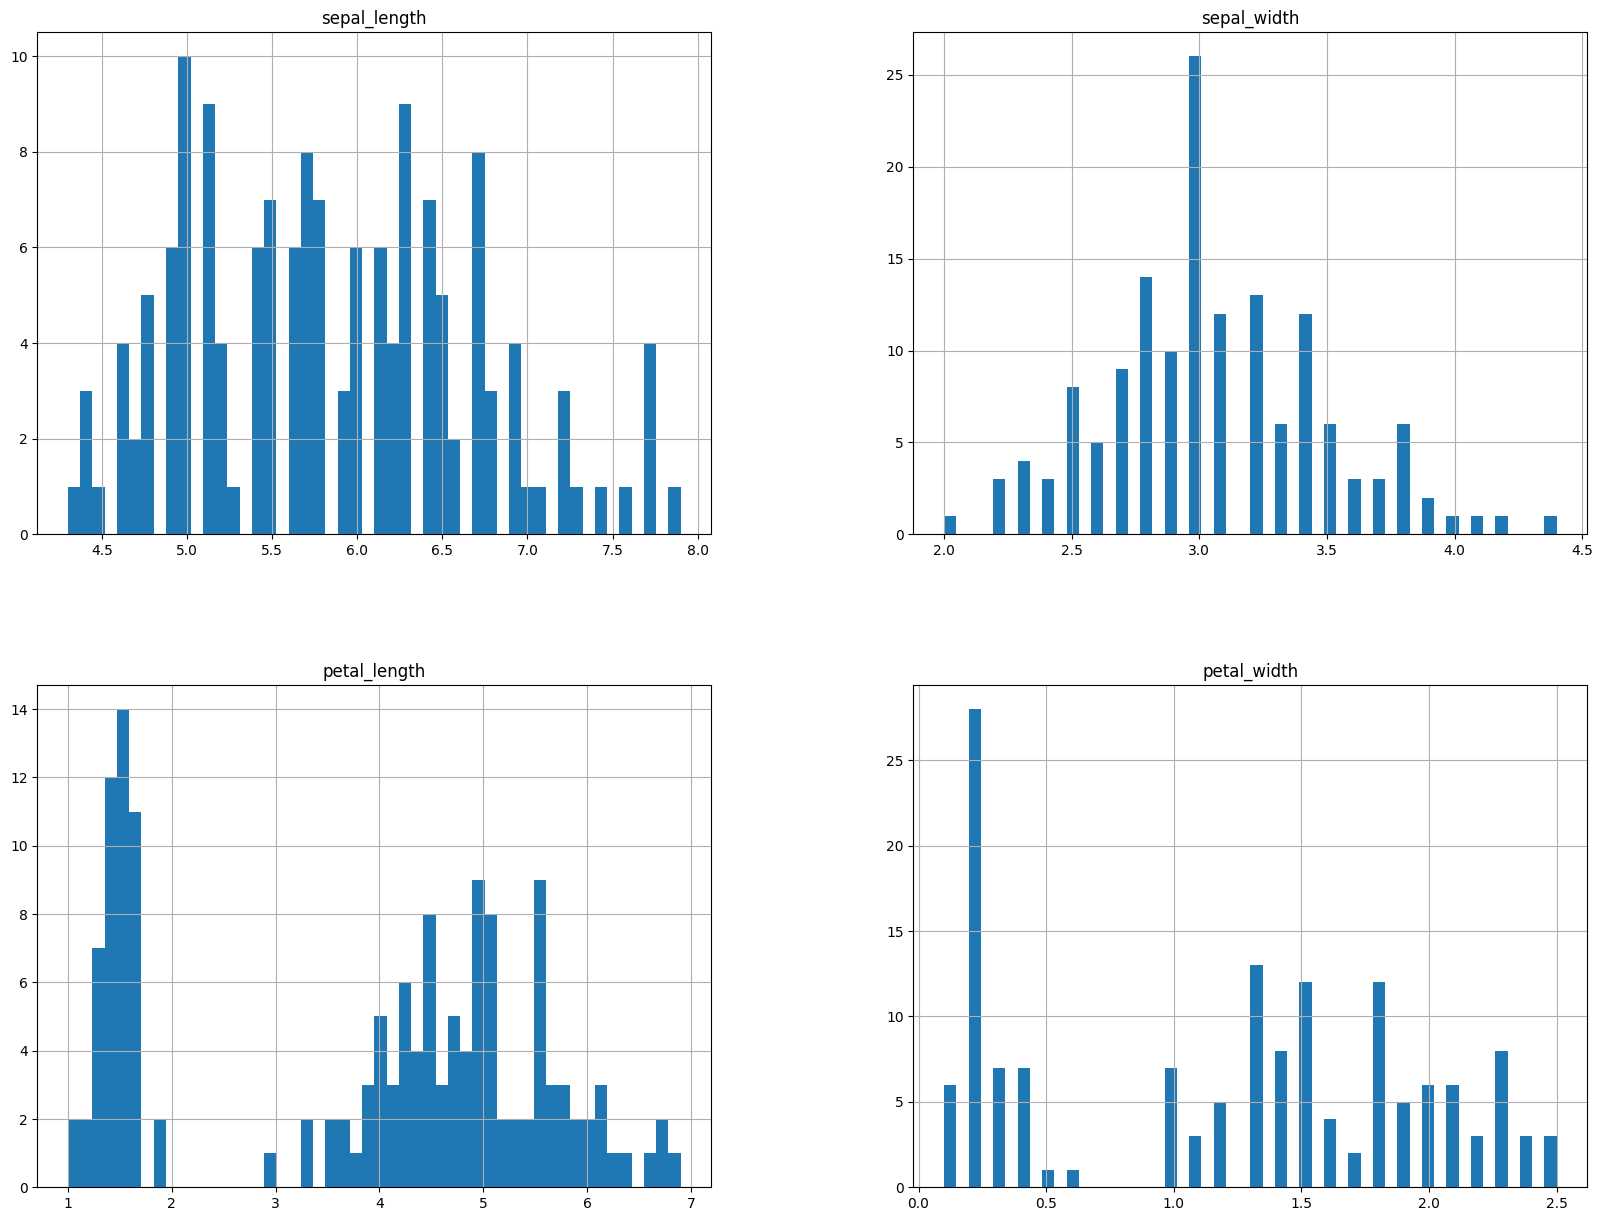

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
sample_data.hist(bins=50,figsize=(20,15))

In [9]:
print("\n\nAttributes in Sample Data:")
print("==========================\n")

print(sample_data.columns)





Attributes in Sample Data:

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [10]:
encoder=LabelEncoder()
sample_data['species']=encoder.fit_transform(sample_data['species'])


In [11]:
sample_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
sample_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#***Features and Labels***

In [13]:
Features=sample_data.drop('species',axis=1)
Label=sample_data['species'].copy()


#***Train Test Splitting***

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(Features,Label,test_size=0.2,random_state=2)

#***Train The Model***

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, np.ravel(Y_train))
print(rf_model)


RandomForestClassifier(random_state=0)


#***Model Evaluate on Testing Data***

In [16]:
model_predictions = rf_model.predict(X_test)

In [17]:
print(model_predictions)

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2]


#***Accuracy***

In [18]:
# Calculate the Accuracy

model_accuracy_score = accuracy_score(Y_test,model_predictions)

print("\n\nAccuracy Score:")
print("===============\n")
print(round(model_accuracy_score,2))



Accuracy Score:

0.97


#***Application Phase***

In [19]:
import pandas as pd
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))


# Create a dictionary with the collected data
data = {
    'sepal_length': [sepal_length],
    'sepal_width': [sepal_width],
    'petal_length': [petal_length],
    'petal_width': [petal_width]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

Enter sepal length: 6.3
Enter sepal width: 2.9
Enter petal length: 5.6
Enter petal width: 1.8
   sepal_length  sepal_width  petal_length  petal_width
0           6.3          2.9           5.6          1.8


In [20]:

df.head()


,sepal_length,sepal_width,petal_length,petal_width
0,6.3,2.9,5.6,1.8


In [21]:
predict=rf_model.predict(df)


In [22]:
if(predict == 0):
    prediction = "IRIS_SETOSA"
if(predict == 1):
    prediction = "IRIS_VERSICOLOR"
if(predict == 2):
    prediction = "IRIS_VERGINICA"

# Add the Prediction in a Pretty Table

pretty_table = PrettyTable()
pretty_table.add_column("       ** Prediction **       ",[prediction])
print(pretty_table)

+--------------------------------+
|        ** Prediction **        |
+--------------------------------+
|         IRIS_VERGINICA         |
+--------------------------------+
